In [1]:
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_data(data_file_path):
    """ Загрузка данных. """
    with open(data_file_path) as input_file:
        X = list()  # Предикторы
        y = list()  # Таргеты
        for line in input_file:
            *row, label = map(float, line.split(','))
            X.append([1] + row)  # Для удобства добавим в вектор признаков 𝑥 фиктивный признак - 1
            y.append(label)
        return np.array(X, dtype=float), np.array(y, dtype=float)

In [3]:
def compute_hypothesis(X, theta):
    """ Вычисление предсказания нашей модели. """
    return X @ theta


def compute_cost(X, y, theta):
    """ Вычисление функции стоимости. """
    m = X.shape[0]  # Количество объектов в выборке
    return 1 / (2 * m) * sum((compute_hypothesis(X, theta) - y) ** 2)


def gradient_descend(X, y, theta, alpha, num_iter):
    """ Реализация градиентного спуска. """
    history = list()
    m = X.shape[0]  # Количество объектов в выборке
    n = X.shape[1]  # Количество признаков у объектов
    for i in range(num_iter):
        theta_temp = theta
        for j in range(n):
            theta_temp[j] = theta_temp[j] - alpha * (compute_hypothesis(X, theta) - y).dot(X[:, j]) / m
        theta = theta_temp
        history.append(compute_cost(X, y, theta))
    return history, theta

In [4]:
def scale_features(X):
    """ Стандартизация признаков. """
    n = X.shape[1]  # Количество признаков у объекта

    for i in range(1, n):  # Здесь начинаем с 1 признака, т.к в X 0-й признак - это всегда 1
        mean_value = X[:, i].mean()
        deviation_value = X[:, i].std()
        standardized_value = (X[:, i] - mean_value) / deviation_value
        X[:, i] = standardized_value

    return X

In [5]:
def normal_equation(X, y):
    """ Нормальное уравнение (аналитический метод). """
    return np.linalg.pinv(X.T @ X) @ X.T @ y

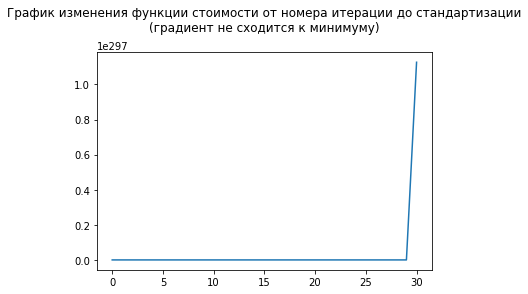

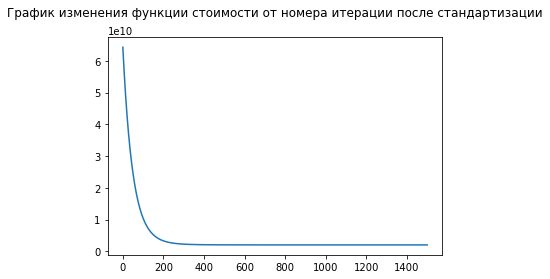

theta, посчитанные через градиентный спуск: [340412.56301439 109371.67272252  -6502.3992545 ], через нормальное уравнение: [340412.65957447 109447.79646964  -6578.35485416]


In [6]:
X, y = load_data('../data/ml/linreg/lab1data2.txt')

history, theta = gradient_descend(X, y, np.array([0, 0, 0], dtype=float), 0.01, 1500)

plt.title('График изменения функции стоимости от номера итерации до стандартизации\n(градиент не сходится к минимуму)\n')
plt.plot(range(len(history)), history)
plt.show()

X = scale_features(X)

history, theta = gradient_descend(X, y, np.array([0, 0, 0], float), 0.01, 1500)

plt.title('График изменения функции стоимости от номера итерации после стандартизации\n')
plt.plot(range(len(history)), history)
plt.show()

theta_solution = normal_equation(X, y)
print(f'theta, посчитанные через градиентный спуск: {theta}, через нормальное уравнение: {theta_solution}')